### Exercise 4
Timing numpy. (8P) 

Measure and compare the time it takes for the numpy-implementations of array- and matrix operations and your own custom operations on lists. When you run your program, it should take care of the following tasks:


1. Implement custom linear algebra functions, operating on Python lists as vectors: 
    - a 3D cross product
	- a scalar product
	- an element by element product of two vectors
	- sum of two vectors
	- a matrix-matrix multiplication (expressing matrices as list of lists) 

2. Check the correct functionality of all your functions with some small random generated lists (ideally with simple $3 \times 3$ matrices and arrays of length $3$). Print as a proof of correctness the results compared to the numpy-internal methods, compare the results using the numpy.allclose function. Look at how lists can be transformed into arrays and vice-versa.
	
3. For a set of array lengths $\{10^3, 10^4, 10^5, 10^6\}$ and $n\times n$-matrices with $n=\{30, 50, 70, 90\}$, fill the given arrays and matrices with random numbers between $0$ and $1$. Hint: Look into numpy.array and numpy.random. 
4. Compare the performance of your own custom functions (all except the cross product) to the performance of the same numpy built-in functionality when operating on the previously defined set of arrays and matrices of different sizes. Make sure to run these operations several times repeatedly, and then average over the complete time. Hint: Import the time library or use the %timeit command in jupyter. You can find an exemplary visualization in the assignment pdf.

In [16]:
import random
import numpy as np
from time import time
import matplotlib.pyplot as plt

In [17]:
def crossprod(x, y):
    z = [0, 0, 0]
    z[0] = (x[1] * y[2] - x[2] * y[1])
    z[1] = (x[2] * y[0] - x[0] * y[2])
    z[2] = (x[0] * y[1] - x[1] * y[0])
    return z

def scalarprod(x, y):
    s = 0
    for i in range(len(x)):
        s += x[i] * y[i]
    return s

def ebeprod(x, y):
    e = np.zeros(shape=len(x), dtype=int).tolist()
    for i in range(len(x)):
        e[i] = x[i] * y[i]
    return e

def sumvec(x, y):
    S = np.zeros(shape=len(x), dtype=int).tolist()
    for i in range(len(x)):
        S[i] = x[i] + y[i]
    return S

def matmult(A, B):
    C = []
    for i in range(len(A)):
        Ci = []
        for j in range(len(B[0])):
            Cij = 0
            for k in range(len(B)):
                Cij += ((A[i])[k] * (B[k])[j])
            Ci.append(Cij)
        C.append(Ci)   
    return C


In [18]:
#Generate x, y
x = np.random.randint(0, 10, size=3).tolist()
y = np.random.randint(0, 10, size=3).tolist()
print("x = ", x, "\ny = ", y)

#Generate A, B
A, B = [], []
for i in range(3):
    l = []
    for j in range(3):
        l.append(random.randint(0, 10))
    A.append(l)

for i in range(3):
    l = []
    for j in range(3):
        l.append(random.randint(0, 10))
    B.append(l)

print("A = ", A, "\nB = ", B)


x =  [1, 1, 2] 
y =  [4, 2, 9]
A =  [[3, 9, 8], [0, 9, 4], [6, 3, 7]] 
B =  [[5, 0, 5], [1, 1, 7], [2, 4, 1]]


In [19]:
z = crossprod(x, y)
zv = np.cross(x, y).tolist()
print("z = ", z, "\nzv = ", zv)

s = scalarprod(x, y)
sv = np.inner(x, y)
print("s = ", s, "\nsv = ", sv)

e = ebeprod(x, y)
ev = np.multiply(x, y).tolist()
print("e = ", e, "\nev = ", ev)

S = sumvec(x, y)
Sv = np.add(x, y).tolist()
print("S = ", S, "\nSv = ", Sv)

C = matmult(A, B)
Cv = np.matmul(A, B).tolist()
print("C = ", C, "\nCv = ", Cv)

print(np.allclose(z, zv),
      np.allclose(s, sv),
      np.allclose(e, ev),
      np.allclose(S, Sv),
      np.allclose(C, Cv))

z =  [5, -1, -2] 
zv =  [5, -1, -2]
s =  24 
sv =  24
e =  [4, 2, 18] 
ev =  [4, 2, 18]
S =  [5, 3, 11] 
Sv =  [5, 3, 11]
C =  [[40, 41, 86], [17, 25, 67], [47, 31, 58]] 
Cv =  [[40, 41, 86], [17, 25, 67], [47, 31, 58]]
True True True True True


In [20]:
a = [1e3, 1e4, 1e5, 1e6]
ln = [int(i) for i in a]
n = [30, 50, 70, 90]

lvec = []
for i in ln:
    lvec.append(np.random.random(size = i))
lmat = []
for i in n:
    lmat.append(np.random.random(size = (i, i)))

In [21]:
def measure(f, x, y, n=1):
    t = 0
    for i in range(n):
        t0 = time()
        f(x, y)
        t += time() - t0
    return t/n


In [22]:
lts, lte, ltS, ltm = [], [], [], []
ltsv, ltev, ltSv, ltmv = [], [], [], []
for i in lvec:
    lts.append(measure(scalarprod, i, i, 10))
    lte.append(measure(ebeprod, i, i, 10))
    ltS.append(measure(sumvec, i, i, 10))
for i in lmat:
    ltm.append(measure(matmult, i, i, 10))

for i in lvec:
    ltsv.append(measure(np.inner, i, i, 2000))
    ltev.append(measure(np.multiply, i, i, 2000))
    ltSv.append(measure(np.add, i, i, 2000))
for i in lmat:
    ltmv.append(measure(np.matmul, i, i, 2000))


[0.0001995086669921875, 0.0026927947998046874, 0.02433500289916992, 0.23115460872650145]


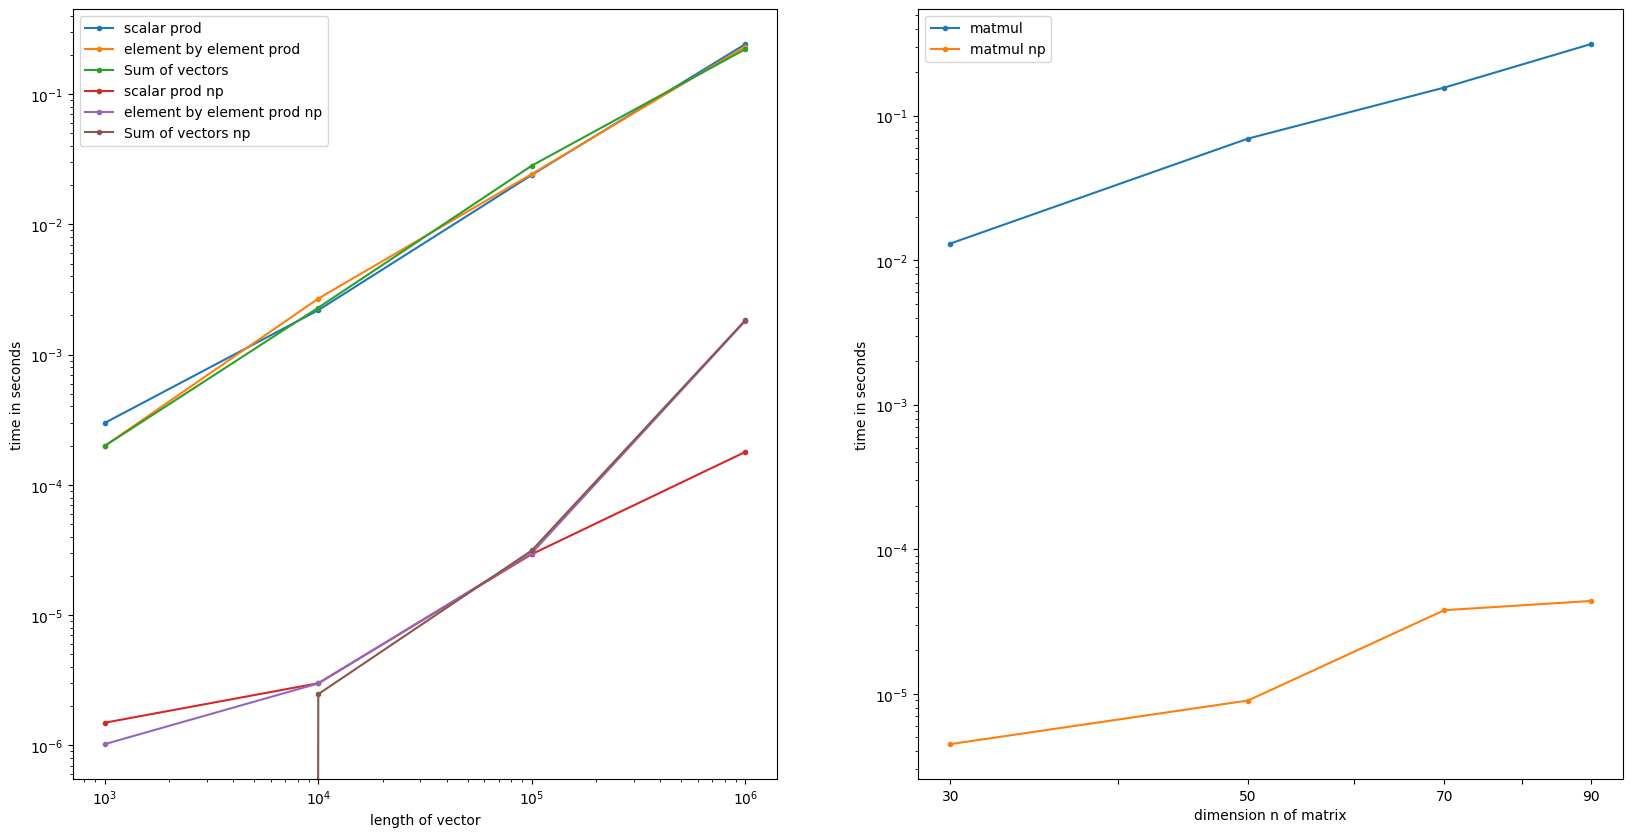

In [23]:
print(lte)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.plot(ln, lts, marker = ".")
ax1.plot(ln, lte, marker=".")
ax1.plot(ln, ltS, marker=".")
ax1.plot(ln, ltsv, marker=".")
ax1.plot(ln, ltev, marker=".")
ax1.plot(ln, ltSv, marker=".")
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_xlabel("length of vector")
ax1.set_ylabel("time in seconds")
ax1.legend(["scalar prod", "element by element prod", "Sum of vectors",
           "scalar prod np", "element by element prod np", "Sum of vectors np"])

ax2.plot(n, ltm, marker = ".")
ax2.plot(n, ltmv, marker=".")
ax2.set_xscale("log")
ax2.set_yscale("log")
ax2.set_xticks([30, 40, 50, 60, 70, 80, 90])
ax2.set_xticklabels(["30", "", "50", "", "70", "", "90"])
ax2.set_xlabel("dimension n of matrix")
ax2.set_ylabel("time in seconds")
ax2.legend(["matmul", "matmul np"])



### Exercise 5

Principal Component Analysis. (6P)

Download the file ex5_pca.xyz. 
In it, you will find the configuration of a ring polymer. 
It is probably helpful to look into numpy for this exercise. Take care of the following tasks:

1. Read in the bead coordinates from the .xyz file.
2. Calculate $\vec{r}_{CM}$ (the polymer's center-of-mass), all the beads have the same mass.
3. Compute and print the gyration tensor  of the polymer ring: 
$\hat{G}_{\alpha\beta} = 1/N \cdot \sum_{i=1}^{N} \vec{s}_{i,\alpha} \cdot \vec{s}_{i,\beta}$ (where $\vec{s}_{i,\alpha} = (\vec{r}_i - \vec{r}_{CM})_{\alpha}$ ) 
4. Compute the polymer's radius of gyration $R_g$ (the sum of diagonal elements of $\hat{G}$ is $R_g^2$) and print it.
5. Use numpy and numpy.linalg to perform a principal component analysis on the polymer ring, and print Eigenvalues and corresponding Eigenvectors from highest to lowest.
6.  Write down in a Markdown cell a conclusion about the orientation of the ring in space. What can the Eigenvalues tell you about its overall shape? Visualizing the 3D coordinates of the polymer might help to draw conclusions, but is optional.

In [24]:
with open("ex5_pca.xyz") as f:
    a = f.readlines()
    a = a[2:]

rawdata = [i.split(" ") for i in a]

#List of lists to ndarray, minus 1.col, minus \n
data = np.array([np.array(i) for i in rawdata])
data[:, 2] = [x[:-2] for x in data[:, 2]]
data = data[:, 1:].astype(float)

In [25]:
rcm = [sum(i)/len(data[:,0]) for i in data.T]
print(rcm)

[-7.119996999999999, -4.919050000000001, 8.639999500000005]


In [26]:
G = np.zeros((len(data[0,:]),len(data[0,:])))

for a in range(3):
    for b in range(3):
        for i in range(len(data)):
            G[a, b] += (data[i, a]-rcm[a])*(data[i, b]-rcm[b])/200

print(G)


[[ 7.26352680e+01 -1.84755962e+00  8.54574056e-02]
 [-1.84755962e+00  7.37154526e+01 -1.09234045e-02]
 [ 8.54574056e-02 -1.09234045e-02  7.23201496e+00]]


In [27]:
R = np.sqrt(sum([G[i,i] for i in range(3)]))
print(R)

12.392850179129121


In [28]:
eig = np.linalg.eig(G)
print("EWs:", eig[0], "\nEVs:\n", eig[1])

EWs: [71.25053658 75.10029677  7.23190221] 
EVs:
 [[-8.00173209e-01 -5.99767569e-01 -1.30300136e-03]
 [-5.99768207e-01  8.00173782e-01  1.28092173e-04]
 [-9.65801993e-04 -8.83994714e-04  9.99999143e-01]]


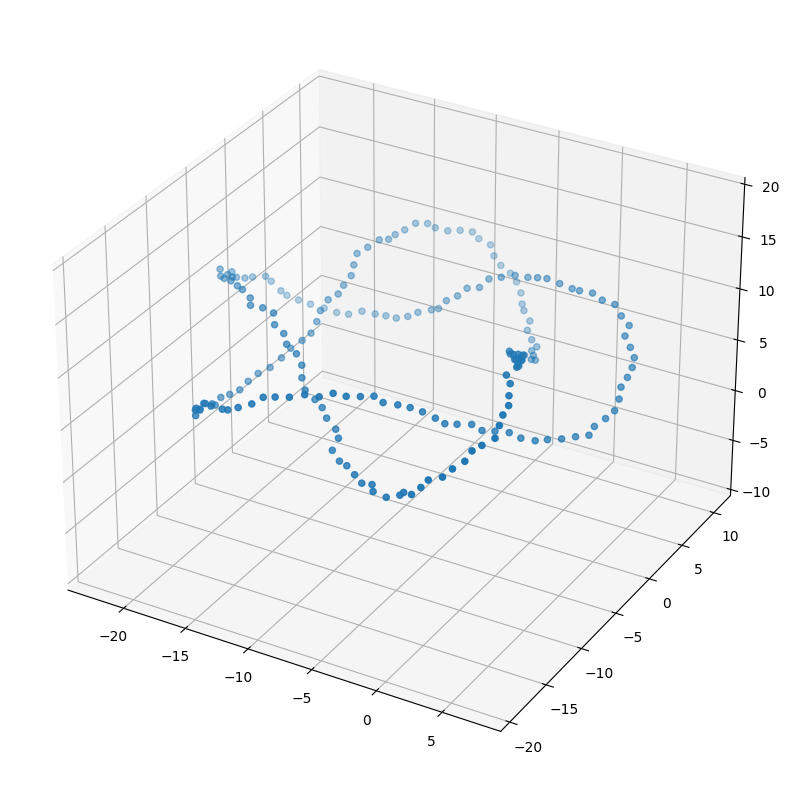

In [29]:
fig = plt.figure(figsize=(12, 10))
ax = plt.axes(projection='3d')
ax.set_zlim3d(-10, 20)
ax.scatter3D(data[:,0], data[:,1], data[:,2])


It seems the Polymer-Ring is orinted with its symetry axis parallel to the z-Axis.
The Eigenvalues EW represent the principal moment of the ring. They represent the molecules willingness to rotate/bend in certain dirctions.

### Exercise 6

Solving equation systems. (4P)

Download the file ex6_eqSystem.dat. 
The file includes four matrices and vectors in the following scheme: The first m columns belong to an $n\times m$ matrix A, the last column to an array B with $n$ elements. Hint: You may want to look into numpy.linalg for this task. 

Optimize the equation system $A \cdot x = b$, performing the following tasks for all four equation systems:

1. Read in the configurations. Hint: Use rstrip("\n") to get rid of trailing newlines. Also, all matrices have the same number of columns.
2. Compute and print the least-square solution $x$ for $A \cdot x = b$.
3. If the solution of the system is unique, the program should tell the user so by printing out a fitting statement.
4. Compute and print the Euclidean-2 norm of the system, i.e. $\parallel b-(A \cdot x)\parallel_2$.

In [30]:
with open("ex6_eqSystem.dat") as f:
    raw = f.readlines()

print(raw)

S = []
for j in range(3):
    S.append([i.rstrip("\n") for i in raw[1+5*j:4+5*j]])
S.append([i.rstrip("\n") for i in raw[16:]])

for i in range(len(S)):
    S[i] = [j.split(" ") for j in S[i]]

for j in S:
    for i in range(len(j)):
        j[i] = [float(x) for x in j[i]]

print(S)

S1 = np.array([np.array(i) for i in S[0]])[:, 0:3]
S2 = np.array([np.array(i) for i in S[1]])[:, 0:3]
S3 = np.array([np.array(i) for i in S[2]])[:, 0:3]
S4 = np.array([np.array(i) for i in S[3]])[:, 0:3]
b1 = np.array([np.array(i) for i in S[0]])[:, 3]
b2 = np.array([np.array(i) for i in S[1]])[:, 3]
b3 = np.array([np.array(i) for i in S[2]])[:, 3]
b4 = np.array([np.array(i) for i in S[3]])[:, 3]

#Attempt at least square solution god damn what is this
l = np.matmul(S3.T, S3)
r = np.matmul(S3.T, b3)
aug = np.c_[l, r]
print(aug)

div = aug[1,0]/aug[0,0]
aug[1] = aug[1]-(aug[0]*div)
print(aug)

div = aug[2, 0]/aug[0, 0]
aug[2] = aug[2]-(aug[0]*div)
print(aug)

div = aug[2, 1]/aug[1, 1]
aug[2] = aug[2]-(aug[1]*div)
print(aug)

# Basic Solutions
try:
    x1 = np.linalg.solve(S1,b1)
    print("x1:", x1)
except:
    pass
try:
    x2 = np.linalg.solve(S2, b2)
    print("x2:", x2)
except:
    pass
try:
    x3 = np.linalg.solve(S3,b3)
    print("x3:", x3)
except:
    pass
try:
    x4 = np.linalg.solve(S4, b4)
    print("x4:", x4)
except:
    print("All other problems are not solvable.")


['# Matrix A1, Vector b1\n', '1 2 3 14\n', '4 5 6 32\n', '7 8 9 50\n', '\n', '# Matrix A2, Vector b2\n', '1 2 3 14\n', '4 5 6 32\n', '7 8 9 60\n', '\n', '# Matrix A3, Vector b3\n', '1 1 1 3\n', '2 3 1 0\n', '1 1 3 -1\n', '\n', '# Matrix A4, Vector b4\n', '1 -2 3 0\n', '1 1 2 -1\n', '3 1 -1 -1\n', '2 -1 -1 1']
[[[1.0, 2.0, 3.0, 14.0], [4.0, 5.0, 6.0, 32.0], [7.0, 8.0, 9.0, 50.0]], [[1.0, 2.0, 3.0, 14.0], [4.0, 5.0, 6.0, 32.0], [7.0, 8.0, 9.0, 60.0]], [[1.0, 1.0, 1.0, 3.0], [2.0, 3.0, 1.0, 0.0], [1.0, 1.0, 3.0, -1.0]], [[1.0, -2.0, 3.0, 0.0], [1.0, 1.0, 2.0, -1.0], [3.0, 1.0, -1.0, -1.0], [2.0, -1.0, -1.0, 1.0]]]
[[ 6.  8.  6.  2.]
 [ 8. 11.  7.  2.]
 [ 6.  7. 11.  0.]]
[[ 6.          8.          6.          2.        ]
 [ 0.          0.33333333 -1.         -0.66666667]
 [ 6.          7.         11.          0.        ]]
[[ 6.          8.          6.          2.        ]
 [ 0.          0.33333333 -1.         -0.66666667]
 [ 0.         -1.          5.         -2.        ]]
[[ 6.          